In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/PROJECT.csv')

In [ ]:
# Check for non-numerical columns
non_numerical_cols = data.select_dtypes(exclude=['number']).columns

# Option 1: Drop non-numerical columns if not needed
# Use len() to check if non_numerical_cols contains any elements.
if len(non_numerical_cols) > 0:
  data = data.drop(columns=non_numerical_cols)

# Option 2: Encode non-numerical columns if needed
# Example using one-hot encoding with pandas get_dummies
# Check if there are any non-numerical columns left after potentially dropping them.
if len(data.select_dtypes(exclude=['number']).columns) > 0:
  data = pd.get_dummies(data, columns=data.select_dtypes(exclude=['number']).columns)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
x_train, x_test = train_test_split(scaled_data, test_size=0.2, random_state=42)

In [ ]:
# Step 4: Build the autoencoder model
input_dim = x_train.shape[1]  # Number of features in the dataset
encoding_dim = 14  # You can change this based on your dataset

In [ ]:
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(7, activation='relu')(encoded)  # Compress to bottleneck
decoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)  # Reconstruct the input

In [ ]:
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Step 5: Train the autoencoder
history = autoencoder.fit(x_train, x_train, epochs=50, batch_size=32, shuffle=True, validation_split=0.2, verbose=1)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0884 - val_loss: 0.0722
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0721 - val_loss: 0.0620
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0623 - val_loss: 0.0551
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0576 - val_loss: 0.0477
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0485 - val_loss: 0.0400
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0401 - val_loss: 0.0317
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0299 - val_loss: 0.0226
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0212 - val_loss: 0.0134
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0118 - val_loss: 0.0072
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0068 - val_loss: 0.0043
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044 - val_loss: 0.0030
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033 - val_lo

In [ ]:
predictions = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - predictions, 2), axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
# Step 7: Set a threshold for anomaly detection
threshold = np.percentile(mse, 95)  # Choose 95th percentile as threshold

# Anomalies are those with MSE above the threshold
anomalies = mse > threshold

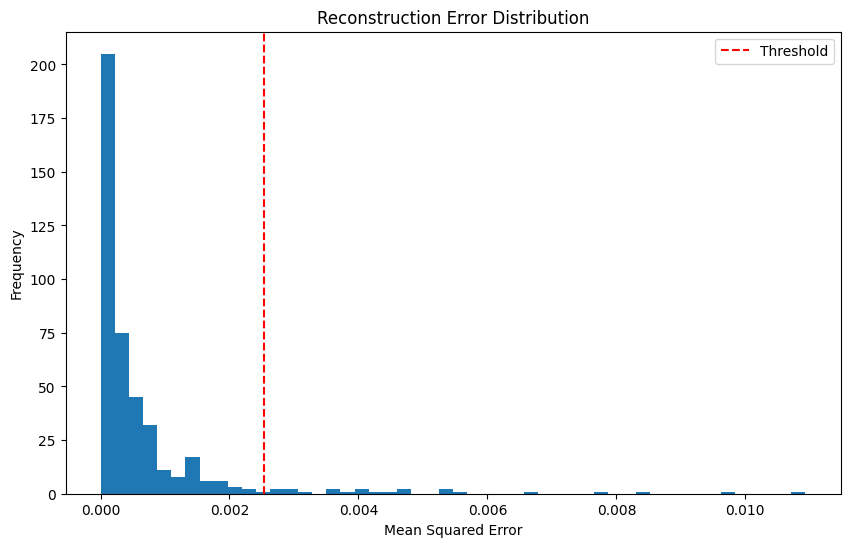

In [ ]:
# Step 8: Visualizing the results
plt.figure(figsize=(10, 6))
plt.hist(mse, bins=50)
plt.axvline(threshold, color='r', linestyle='--', label='Threshold')
plt.title("Reconstruction Error Distribution")
plt.xlabel("Mean Squared Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [ ]:
# Step 9: Print results
print(f"Number of anomalies detected: {np.sum(anomalies)}")

Number of anomalies detected: 22
